# 1. Повнозв'язані нейронні мережі
Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 

In [1]:
import pandas as pd
glass_data = pd.read_csv("glass/glass.csv").dropna()

In [2]:
X = glass_data.drop("Type", axis=1)
y = glass_data['Type']

In [3]:
y.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [4]:
from sklearn.preprocessing import LabelBinarizer

y = LabelBinarizer().fit_transform(y)

In [5]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [6]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_std = scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y, test_size=0.2,stratify=y)

### Створення FNN

In [8]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            128, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(6, activation="sigmoid"),
    ]
)
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 9926 (38.77 KB)
Trainable params: 9926 (38.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [10]:
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=16,
                    validation_split=0.2, verbose = 2)

Epoch 1/200


9/9 - 1s - loss: 0.6824 - accuracy: 0.2794 - val_loss: 0.6493 - val_accuracy: 0.5143 - 1s/epoch - 155ms/step
Epoch 2/200
9/9 - 0s - loss: 0.6257 - accuracy: 0.4191 - val_loss: 0.5910 - val_accuracy: 0.5143 - 45ms/epoch - 5ms/step
Epoch 3/200
9/9 - 0s - loss: 0.5654 - accuracy: 0.4118 - val_loss: 0.5258 - val_accuracy: 0.5143 - 66ms/epoch - 7ms/step
Epoch 4/200
9/9 - 0s - loss: 0.5016 - accuracy: 0.4118 - val_loss: 0.4618 - val_accuracy: 0.5143 - 81ms/epoch - 9ms/step
Epoch 5/200
9/9 - 0s - loss: 0.4414 - accuracy: 0.4338 - val_loss: 0.4125 - val_accuracy: 0.5429 - 60ms/epoch - 7ms/step
Epoch 6/200
9/9 - 0s - loss: 0.3952 - accuracy: 0.4412 - val_loss: 0.3858 - val_accuracy: 0.5429 - 69ms/epoch - 8ms/step
Epoch 7/200
9/9 - 0s - loss: 0.3682 - accuracy: 0.4632 - val_loss: 0.3762 - val_accuracy: 0.4286 - 52ms/epoch - 6ms/step
Epoch 8/200
9/9 - 0s - loss: 0.3528 - accuracy: 0.4926 - val_loss: 0.3707 - val_accuracy: 0.4286 - 45ms/epoch - 5ms/step
Epoch 9/200
9/9 - 0s - loss: 0

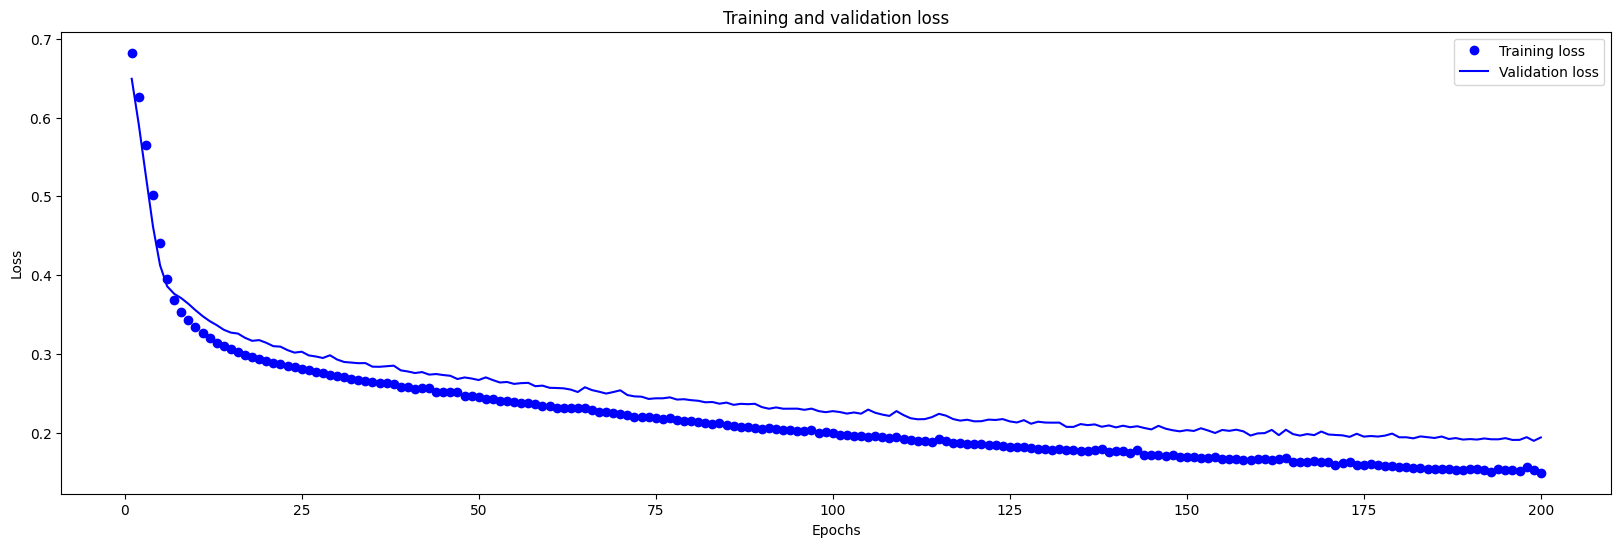

In [11]:
import matplotlib
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(20, 6))
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.2551582157611847
Test accuracy: 0.7209302186965942


#### У лр1 - Найкраща модель: RandomForest (accuracy = 0.66)
#### Зараз - accuracy = 0.72 - результат майже такий самий

# 2. Згорткові нейронні мережі
Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі (якщо в обраному датасеті класів забагато, достатньо залишити 3-5).

### Data: https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

images = ImageDataGenerator(rescale = 1.0/255).flow_from_directory("Multi-class Weather Dataset",target_size=(64, 64),shuffle=0) 

Found 95 images belonging to 4 classes.


In [14]:
import numpy as np
X=np.concatenate([images.next()[0] for i in range(images.__len__())]) 
y=np.concatenate([images.next()[1] for i in range(images.__len__())])

In [15]:
labels = ["Cloudy",
        "Rain",
        "Shine",
        "Sunrise"]

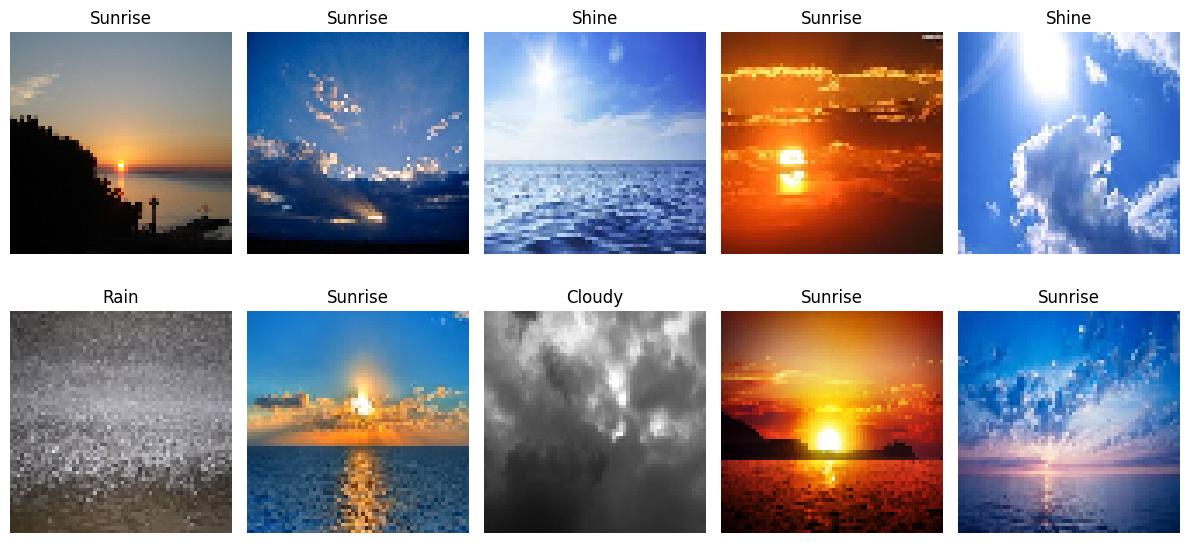

In [16]:
import matplotlib.pyplot as plt
import random

# Select 10 random indices
random_indices = random.sample(range(X.shape[0]), 10)

# Plot the selected augmented images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    img_index = random_indices[i]
    img = X[img_index]
    label = np.argmax(y[img_index])
    
    ax.imshow(img)
    ax.set_title(labels[label])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

num_classes=4

model = keras.Sequential(
    [
        keras.Input(shape=X[0].shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dropout (Dropout)           (None, 61504)             0         
                                                                 
 dense_3 (Dense)             (None, 4)                 246020    
                                                                 
Total params: 247812 (968.02 KB)
Trainable params: 247812 (968.02 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [19]:
batch_size = 32
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
2/2 [==============================] - 1s 213ms/step - loss: 1.6124 - accuracy: 0.3846 - val_loss: 1.9747 - val_accuracy: 0.2857
Epoch 2/15
2/2 [==============================] - 0s 189ms/step - loss: 1.6655 - accuracy: 0.3846 - val_loss: 1.4877 - val_accuracy: 0.4286
Epoch 3/15
2/2 [==============================] - 0s 73ms/step - loss: 0.9136 - accuracy: 0.6346 - val_loss: 0.8568 - val_accuracy: 0.7143
Epoch 4/15
2/2 [==============================] - 0s 79ms/step - loss: 0.6319 - accuracy: 0.7692 - val_loss: 0.7589 - val_accuracy: 0.7143
Epoch 5/15
2/2 [==============================] - 0s 113ms/step - loss: 0.5849 - accuracy: 0.7692 - val_loss: 0.7564 - val_accuracy: 0.7857
Epoch 6/15
2/2 [==============================] - 0s 78ms/step - loss: 0.4832 - accuracy: 0.8654 - val_loss: 0.7270 - val_accuracy: 0.7143
Epoch 7/15
2/2 [==============================] - 0s 73ms/step - loss: 0.4164 - accuracy: 0.9423 - val_loss: 0.8126 - val_accuracy: 0.6429
Epoch 8/15
2/2 [========

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5925658941268921
Test accuracy: 0.6896551847457886


# 3. Рекурентні нейронні мережі
Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі. Результати порівняйте з одержаними раніше. 

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = pd.read_csv("sms-spam-collection-a-more-diverse-dataset/train.csv")

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = word_tokenize(text) #Tokenization
    words = [word.lower() for word in words if word.isalnum()] #to Lowercase
    words = [word for word in words if word not in stopwords.words("english")] #Remove Stopwords
    return " ".join(words) #Concate tokens

data['clear_sms'] = data['sms'].apply(preprocess_text)

In [22]:
X = data['clear_sms'].values
y = data['label']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
max_features = 3000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [25]:
max_seq_len = 100 
X_train = keras.preprocessing.sequence.pad_sequences (X_train, maxlen=max_seq_len)
X_test = keras.preprocessing.sequence.pad_sequences (X_test, maxlen=max_seq_len)

In [26]:
emb_dim = 128

model = keras.Sequential()
model.add(layers.Embedding(max_features, emb_dim))
model.add(layers.LSTM(64))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         384000    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 433473 (1.65 MB)
Trainable params: 433473 (1.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [28]:
model.compile(optimizer="adam",loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose = 1)

Epoch 1/10
56/56 [==============================] - 5s 54ms/step - loss: 0.2769 - accuracy: 0.9058 - val_loss: 0.1145 - val_accuracy: 0.9664
Epoch 2/10
56/56 [==============================] - 3s 47ms/step - loss: 0.0567 - accuracy: 0.9874 - val_loss: 0.0709 - val_accuracy: 0.9787
Epoch 3/10
56/56 [==============================] - 3s 57ms/step - loss: 0.0231 - accuracy: 0.9952 - val_loss: 0.0562 - val_accuracy: 0.9809
Epoch 4/10
56/56 [==============================] - 3s 58ms/step - loss: 0.0136 - accuracy: 0.9966 - val_loss: 0.0469 - val_accuracy: 0.9865
Epoch 5/10
56/56 [==============================] - 3s 57ms/step - loss: 0.0093 - accuracy: 0.9980 - val_loss: 0.0479 - val_accuracy: 0.9877
Epoch 6/10
56/56 [==============================] - 3s 51ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.0577 - val_accuracy: 0.9798
Epoch 7/10
56/56 [==============================] - 3s 60ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0555 - val_accuracy: 0.9843
Epoch 8/10
56

In [29]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0692879781126976
Test accuracy: 0.9874439239501953


#### У лр 1: при використанні KNN accuracy = 0.58 
#### Зараз: accuracy = 0.987 - результат покращився